In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm, t
%matplotlib inline

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/__init__.py:1120: UserWarning: Bad val "TkAggX" on line #1
	"backend: TkAggX
"
	in file "/Users/costefan/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string "tkaggx": valid strings are ['GTK', 'GTKAgg', 'GTKCairo', 'MacOSX', 'Qt4Agg', 'Qt5Agg', 'TkAgg', 'WX', 'WXAgg', 'GTK3Cairo', 'GTK3Agg', 'WebAgg', 'nbAgg', 'agg', 'cairo', 'gdk', 'pdf', 'pgf', 'ps', 'svg', 'template']
  (val, error_details, msg))


In [2]:
mu, s2 = 10, 9
sigma = np.sqrt(s2)

In [3]:
s = norm.rvs(loc=mu, scale=sigma, size=50, random_state=42)

## Task 1

### (a)

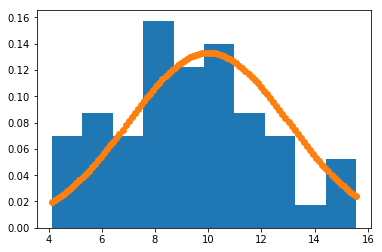

In [4]:
plt.hist(s, normed=True)
x = np.linspace(np.min(s), np.max(s), 100)
plt.plot(x, norm.pdf(x, mu, sigma), '-o')

### (b)

In [5]:
t_dist = t.rvs(5, size=50, random_state=42)

$$t_{transformed} = 10+ 3 sqrt(3/5)* y_i$$

In [6]:
transformed_t = 10 + 3 * np.sqrt(3/5) * t_dist

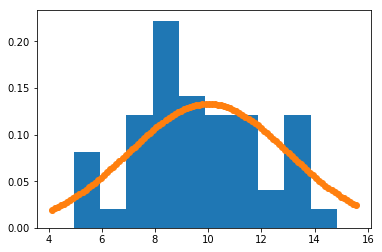

In [7]:
plt.hist(transformed_t, normed=True)
plt.plot(x, mlab.normpdf(x, mu, sigma), '-o')

## Task 2

### (a)

In [8]:
p = 49
outlier_sample = [16 + index * 8 / p for index in range(0, 50)]

### Mean

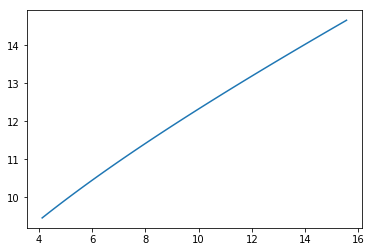

In [9]:
x = np.linspace(np.min(s), np.max(s), 50)
means = []
for i in range(1, len(outlier_sample) + 1):
    sample = np.concatenate((s, outlier_sample[:i]))
    means.append(np.mean(sample))
plt.plot(x, means)

### Median

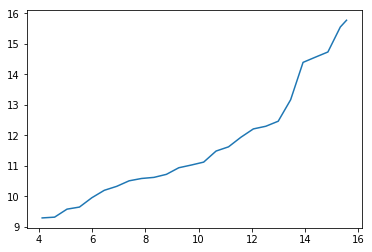

In [10]:
x = np.linspace(np.min(s), np.max(s), 50)
medians = []
for i in range(1, len(outlier_sample) + 1):
    sample = np.concatenate((s, outlier_sample[:i]))
    medians.append(np.median(sample))
plt.plot(x, medians)

### Variance

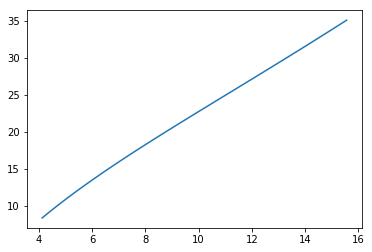

In [11]:
x = np.linspace(np.min(s), np.max(s), 50)
variances = []
for i in range(1, len(outlier_sample) + 1):
    sample = np.concatenate((s, outlier_sample[:i]))
    variances.append(np.var(sample))
plt.plot(x, variances)

### (b)

In [12]:
additional_samples = []
for i in range(10, 100):
    additional_samples.append(norm.rvs(20, 2, size=i))

### All subsamples histogram

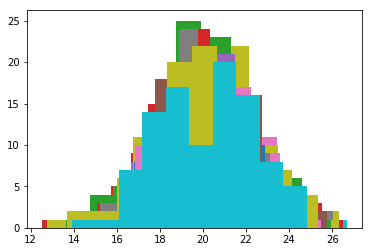

In [13]:
for i in additional_samples:
    plt.hist(i)

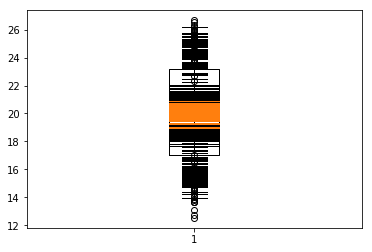

In [14]:
for i in additional_samples:
     plt.boxplot(i)

### Few different m

{'boxes': [<matplotlib.lines.Line2D at 0x1136e1b70>],
 'caps': [<matplotlib.lines.Line2D at 0x1136ed978>,
 'fliers': [<matplotlib.lines.Line2D at 0x113702128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113702550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1136e1b38>,
  <matplotlib.lines.Line2D at 0x1136e7198>]}

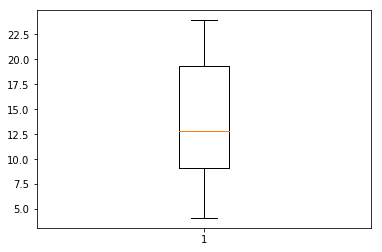

In [15]:
m = 30

sample = np.concatenate((s, additional_samples[m]))
plt.boxplot(sample)

(array([  4.,   4.,   4.,   2.,   8.,   8.,   8.,   4.,   3.,   1.,   3.,
          2.,   2.,   2.,   8.,  11.,   3.,   9.,   2.,   2.]),
 array([  4.12098963,   5.11003931,   6.09908899,   7.08813867,
          8.07718836,   9.06623804,  10.05528772,  11.0443374 ,
         12.03338708,  13.02243677,  14.01148645,  15.00053613,
         15.98958581,  16.97863549,  17.96768517,  18.95673486,
         19.94578454,  20.93483422,  21.9238839 ,  22.91293358,  23.90198327]),
 <a list of 20 Patch objects>)

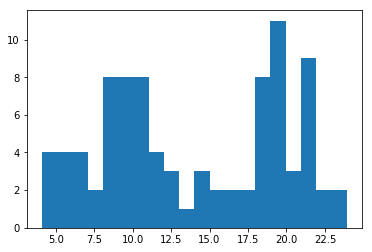

In [16]:
plt.hist(sample, bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x11388e8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x113894dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x11389deb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1142d1be0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11388e5c0>,
  <matplotlib.lines.Line2D at 0x113894c50>]}

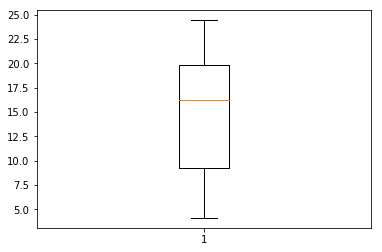

In [17]:
m = 40 
sample = np.concatenate((s, additional_samples[m]))
plt.boxplot(sample)

(array([  4.,   4.,   4.,   2.,  10.,   7.,   8.,   4.,   3.,   0.,   3.,
          1.,   4.,   3.,  12.,   9.,  10.,   3.,   4.,   5.]),
 array([  4.12098963,   5.1361132 ,   6.15123678,   7.16636035,
          8.18148393,   9.1966075 ,  10.21173108,  11.22685465,
         12.24197823,  13.2571018 ,  14.27222538,  15.28734895,
         16.30247253,  17.3175961 ,  18.33271968,  19.34784325,
         20.36296683,  21.37809041,  22.39321398,  23.40833756,  24.42346113]),
 <a list of 20 Patch objects>)

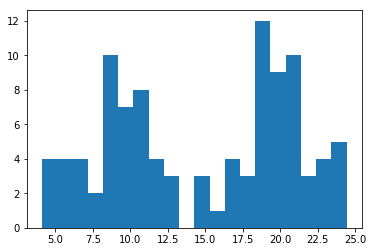

In [18]:
plt.hist(sample, bins=20)

### (d)

### Animated

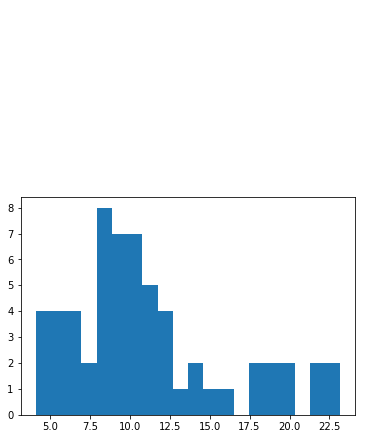

In [19]:
import matplotlib.animation as animation

samples = []
for _ in additional_samples:
    samples.append(np.concatenate((s, _)))
    
n = 100
number_of_frames = len(samples)


def update_hist(num, samples):
    plt.cla()
    plt.hist(samples[num], bins=20)

fig = plt.figure()
hist = plt.hist(samples[0])

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(samples, ) )
plt.show()

## Task 3

In [45]:
p = 0.3
U_ = np.random.standard_normal(1000)
V_ = np.random.standard_normal(1000)

U = U_
V = p * U + np.sqrt(1 - p**2) * V_

In [46]:
from scipy.stats.stats import pearsonr  
corr = pearsonr(U, V)

### Checking correlation

In [47]:
np.isclose(p, corr[0], rtol=0.1)

True

### Variances

In [80]:
np.var(U)

8.677735222878848

In [81]:
np.var(V)

0.78280359580465153

In [82]:
p = 0.3
U_ = np.random.normal(0, 3, 1000)
V_ = np.random.normal(0, 3, 1000)

U = U_
V = p * U + p ** 2 * V

In [83]:
np.isclose(p, corr[0], rtol=0.1)

True

### Pearson correlation

In [84]:
corr1 = pearsonr(U, V)
print(corr1[0])

0.995973052729


### Spearman's

In [85]:
from scipy.stats.stats import spearmanr
corr2 = spearmanr(U, V)
print(corr2[0])

0.995400563401


In [86]:
V_sq = V ** 2

### Pearson corr

In [87]:
corr1 = pearsonr(U, V_sq)
print(corr1[0])

-0.00123571249273


### Spearman's

In [88]:
corr2 = spearmanr(U, V_sq)
print(corr2[0])

0.00464694464694
